In [1]:
from fedn import APIClient
import time
import uuid
import json
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
DISCOVER_HOST = '10.0.0.4'
DISCOVER_PORT = 8092
client = APIClient(DISCOVER_HOST, DISCOVER_PORT)

In [3]:
sessions = [session['session_id'] for session in client.list_sessions()['result']]

for i in range(len(sessions)):
    print(f"{i+1}: {sessions[i]}")

1: experiment_fedavg_LF_08_00
2: experiment_fedavg_LF_07_01
3: experiment_fedavg_LF_06_02
4: experiment_fedavg_LF_05_03


In [4]:
session_ids_to_analyze = [int(x) - 1 for x in input("Provide a the sessions to be analyzed, seperated by a space: ").split()]

Provide a the sessions to be analyzed, seperated by a space:  1 2 3 4


In [5]:
session_ids_to_analyze 

[0, 1, 2, 3]

In [6]:
model_sets = [client.list_models(session) for session in sessions]

In [7]:
# Check if round counts are same for all sessions
const_model_count = model_sets[0]['count']
for model_set in model_sets:
    if model_set['count'] != const_model_count:
        print("There is atleast one session which doesn't have the same model count")
        # Add code to terminate the script

In [8]:
selected_model_sets = [model_sets[x] for x in session_ids_to_analyze]

for selected_model_set in selected_model_sets:
    selected_model_set['result'].reverse()

In [9]:
# client.list_validations(modelId = '388a829d-f2db-42c5-9c3d-0c5278659999')

metrics = []

for session_id_to_analyze in session_ids_to_analyze:
    session_metrics = {
        "session_id": sessions[session_id_to_analyze],
        "training_loss": [],
        "training_accuracy": [],
        "test_loss": [],
        "test_accuracy": []
    }
    
    model_set = model_sets[session_id_to_analyze]['result']

    for model in model_set:
        validations = client.list_validations(modelId = model['model'])
        result_ids = [result_id for result_id in validations]
        training_losses = []
        training_accuracies = []
        test_losses = []
        test_accuracies = []
        
        for result_id in result_ids:
            training_losses.append(json.loads(validations[result_id]['data'])['training_loss'])
            training_accuracies.append(json.loads(validations[result_id]['data'])['training_accuracy'])
            test_losses.append(json.loads(validations[result_id]['data'])['test_loss'])
            test_accuracies.append(json.loads(validations[result_id]['data'])['test_accuracy'])

        session_metrics['training_loss'].append(np.mean(training_losses))
        session_metrics['training_accuracy'].append(np.mean(training_accuracies))
        session_metrics['test_loss'].append(np.mean(test_losses))
        session_metrics['test_accuracy'].append(np.mean(test_accuracies))

    metrics.append(session_metrics)

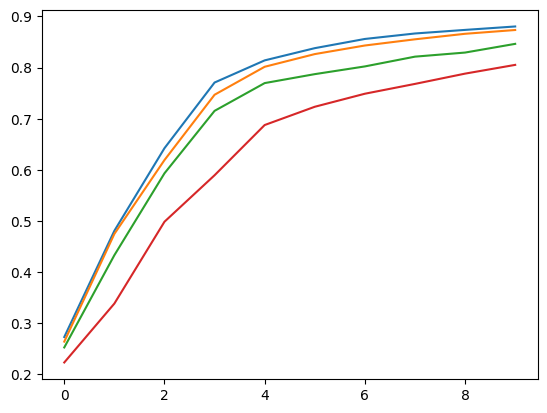

In [10]:
x = range(const_model_count)

for experiment in metrics:
    plt.plot(x, experiment['test_accuracy'])

